In [ ]:
import numpy as np
import matplotlib.pyplot as plt
iris_data_file = open('iris/iris.data','r')
lines = iris_data_file.readlines()[:-1]
iris_data = []
for i in lines:
    try:
        point = i[:-2].split(',')
        if point[-1] == 'Iris-setos':
            label = 0
        elif point[-1] == 'Iris-versicolo':
            label = 1
        else:
            label = 2
        a=float(point[0])
        b=float(point[1])
        c=float(point[2])
        d=float(point[3])
        one_point = [a,b,c,d,label]
        iris_data.append(one_point)
    except:
        continue

iris_data = np.array(iris_data)
X = iris_data[:,:-1]
y = iris_data[:,-1]
X  = X[:100]
y = y[:100]
# X = X[:,[2,3]]
y = 2*y-1

In [ ]:
X.shape,y.shape

((100, 4), (100,))

In [ ]:
y

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [ ]:
def gradF_a(w,b,a):
    array_ones = np.ones((X.shape[0],1))
    array_yb = y.reshape(-1)*b
    array_yb = array_yb.reshape(len(array_yb),1)
    inner_prod = np.inner(w.T,X).T.reshape(-1) * y
    inner_prod =  inner_prod.reshape(len(inner_prod),1)
    grad_alpha = array_ones - inner_prod + array_yb
    return grad_alpha

def gradF_w(w,b,a):
    ww = 2*w
    ay = a.reshape(-1)*y
    ay = ay.reshape(len(ay),1)
    grad_w = ww  - np.dot(X.T , ay)
    return grad_w

def gradF_b(w,b,a):
    return -np.dot(a.reshape(1,100),y.reshape(100,1) )

In [ ]:
def maximize_alpha(a,w,b,T):
    lr = 0.1
    a_old = a
    for i in range(T):
        grad = gradF_a(w,b,a_old)
        a_new = a_old + lr * grad
        a_new [a_new <= 0] = 0
        if np.all(abs(a_new - a_old)) <= 0.1:
            break
        a_old = a_new
    return a_new

def minimize_wb(a,w,b,T):
    lr1 = 0.01
    lr2 = 0.001
    w_old = w
    b_old = b

    for t in range(T):

        gradw = gradF_w(w_old,b_old,a)
        w_new = w_old - lr1 * gradw

        gradb = gradF_b(w_new,b_old,a)
        b_new = b_old - lr2 * gradb

        if np.all(abs(w_new - w_old)) <=0.1 or abs(b_new - b_old) <=0.1:
            break

        w_old,b_old = w_new,b_new

    return w_new, np.squeeze(b_new)

In [ ]:
w = np.random.randn(X.shape[1],1)
b = np.random.randn(1)
a = np.random.randn(len(X),1)
print(w.shape)
print(b.shape)
print(a.shape)
w_old, b_old, a_old = w, b, a
w,b

(4, 1)
(1,)
(100, 1)


(array([[ 0.89222193],
        [ 0.03965905],
        [-0.94711553],
        [-0.08875609]]),
 array([-0.27733908]))

In [ ]:
eps = 0.000001
for idx in range(20):
    print(idx,end= " ")
    w_new,b_new = minimize_wb(a_old,w_old,b_old,25)
    a_new = maximize_alpha(a_old,w_new,b_new,25)
    if np.all(abs(a_old - a_new) <= eps) or np.all(abs(w_old - w_new) <= eps) or abs(b_old - b_new) <= eps :
            break
    else:
        norm = np.linalg.norm(w_new)
        w_new,b_new = w_new/norm, b_new/norm
        w_old,b_old,a_old = w_new,b_new,a_new


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

In [ ]:
w0,b0 =  w_new,b_new
w0,b0

(array([[-0.80171866],
        [-0.54846864],
        [-0.23426645],
        [-0.03935199]]),
 -0.020099149856637563)

In [ ]:
cor=0
for inp,out in zip(X,y):
    if out*(np.dot(inp,w0)+b0)>0:
        cor+=1
print("Accuracy : ",cor/len(X)*100)

Accuracy :  50.0


# 1. Using the **Iris dataset**, select any two classes. Write Python code to implement the **Hard Support Vector Machine (Hard-SVM)** algorithm. Plot the error as a function of the number of iteration of the algorithm.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

iris_data_file = open('iris/iris.data','r')
lines = iris_data_file.readlines()[:-1]
iris_data = []
for i in lines:
    try:
        point = i[:-2].split(',')
        if point[-1] == 'Iris-setos':
            label = 0
        elif point[-1] == 'Iris-versicolo':
            label = 1
        else:
            label = 2
        a=float(point[0])
        b=float(point[1])
        c=float(point[2])
        d=float(point[3])
        one_point = [a,b,c,d,label]
        iris_data.append(one_point)
    except:
        continue

iris_data = np.array(iris_data)
X = iris_data[:,:-1]
y = iris_data[:,-1]
X  = X[:100]
X = X[:,[2,3]]
y = y[:100]
y = 2*y-1

In [ ]:
class SVM_soft_margin:

    def __init__(self, alpha = 0.001, lambda_ = 0.01, n_iterations = 1000):
        self.alpha = alpha # learning rate
        self.lambda_ = lambda_ # tradeoff
        self.n_iterations = n_iterations # number of iterations
        self.w = None # weights or slopes
        self.b = None # intercept


    def fit(self, X, y):

        n_samples, n_features = X.shape
        self.w = np.zeros(n_features) # initalizing with 0
        self.b = 0 # initializewith 0
        errors=[]
        for iteration in range(self.n_iterations):
            er=0
            for i, Xi in enumerate(X):
                # yixiw-b≥1
                if y[i] * (np.dot(Xi, self.w) - self.b) >= 1 :
                    self.w -= self.alpha * (2 * self.lambda_ * self.w) # w = w + α* (2λw - yixi)
                else:
                    self.w -= self.alpha * (2 * self.lambda_ * self.w - np.dot(Xi, y[i])) # w = w + α* (2λw - yixi)
                    self.b -= self.alpha * y[i] # b = b - α* (yi)
                    er+=1
            errors.append(er)
        return self.w, self.b,errors


    def predict(self, X):
        pred = np.dot(X, self.w) - self.b
        result = [1 if val > 0 else -1 for val in pred] # returning in the form of -1 and 1
        return result
def get_hyperplane(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
def plot_svm(X, y, w, b, title ='Plot for linear SVM'):

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane(x0_1, w, b, 0)
    x1_2 = get_hyperplane(x0_2, w, b, 0)

    x1_1_m = get_hyperplane(x0_1, w, b, -1)
    x1_2_m = get_hyperplane(x0_2, w, b, -1)

    x1_1_p = get_hyperplane(x0_1, w, b, 1)
    x1_2_p = get_hyperplane(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.title(title)
    plt.show()

Accuracy : 1.0


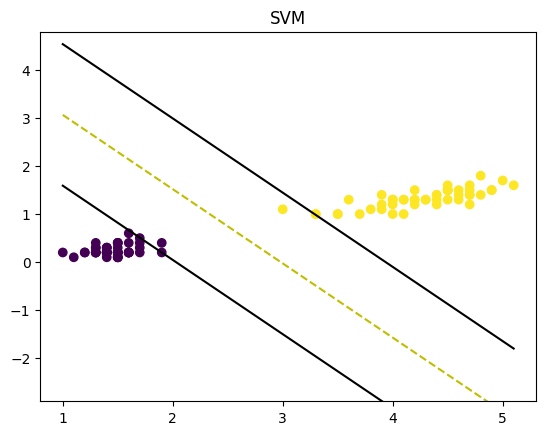

In [ ]:
svm1 = SVM_soft_margin()
w1,b1,errr = svm1.fit(X,y)
print("Accuracy :" ,accuracy_score(svm1.predict(X),y))
plot_svm(X, y, w1, b1, title= 'SVM')

Text(0, 0.5, 'Error')

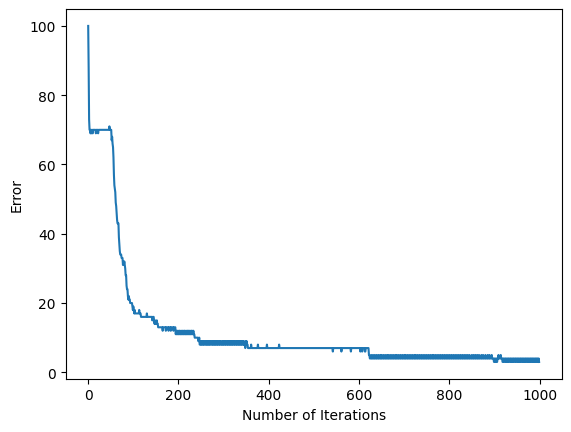

In [ ]:
plt.plot(errr)
plt.xlabel("Number of Iterations")
plt.ylabel("Error")

# 2. Generate a dataset with two classes in n-dimensional space where there is 5% overlap between the classes. Write Python code to implement a **Soft Support Vector Machine (Soft-SVM)** algorithm and find the **best hyperplane** along with **support vectors** and plot them for $n=2$ and $n=3$.



### n=2

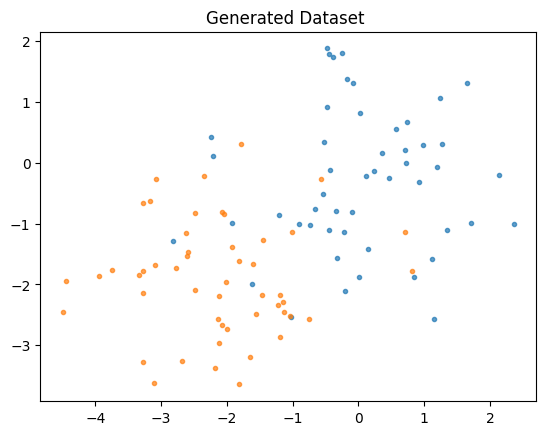

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
samples = 50
data1 = np.random.multivariate_normal([0,0],[[1,0],[0,1]],samples)
data2 = np.random.multivariate_normal([-2.05,-2.05],[[1,0],[0,1]],samples)


X2 = np.vstack((data1, data2))
y2 = np.hstack((-1*np.ones(samples), np.ones(samples)))

plt.title('Generated Dataset ')
plt.scatter(data1[:, 0],data1[:, 1],alpha=0.7, marker='.')
plt.scatter(data2[:, 0],data2[:, 1],alpha=0.7, marker='.')

Acurracy score: 0.9


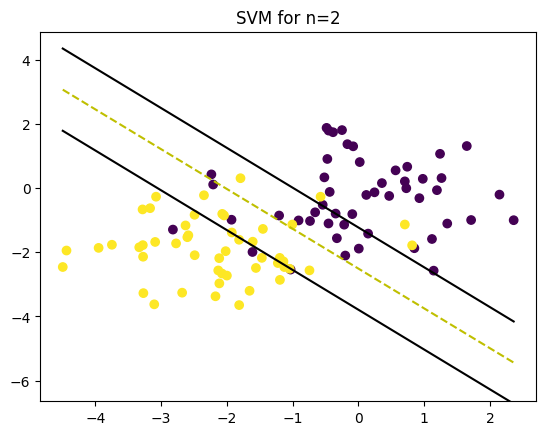

In [ ]:
svm2 = SVM_soft_margin()
w2,b2,errors2 = svm2.fit(X2,y2)
print("Acurracy score:" ,accuracy_score(svm2.predict(X2),y2))
plot_svm(X2, y2, w2, b2, title= 'SVM for n=2')

Text(0.5, 1.0, 'Error plot for n=2')

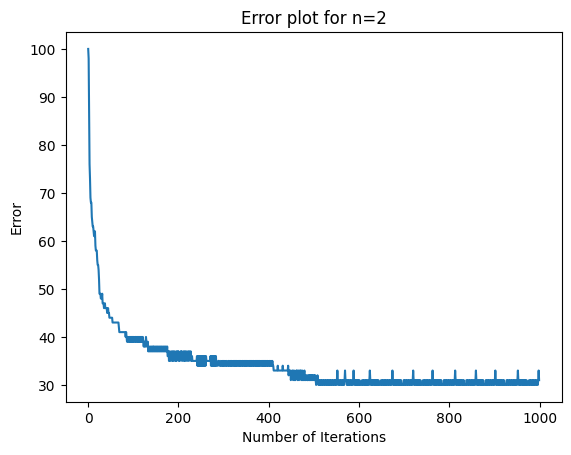

In [ ]:
plt.plot(errors2)
plt.xlabel("Number of Iterations")
plt.ylabel("Error")
plt.title("Error plot for n=2")

### n=3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
samples = 50
data1 = np.random.multivariate_normal([0,0,0],[[1,0,0],[0,1,0],[0,0,1]],samples)
data2 = np.random.multivariate_normal([-2.05,-2.05,-2.05],[[1,0,0],[0,1,0],[0,0,1]],samples)


X3 = np.vstack((data1, data2))
y3 = np.hstack((-1*np.ones(samples), np.ones(samples)))


In [ ]:
svm3 = SVM_soft_margin()
w3,b3,err3 = svm1.fit(X3,y3)
print("Accuracy Score :" ,accuracy_score(svm1.predict(X3),y3))


Accuracy Score : 0.98


Text(0.5, 1.0, 'Error plot for n=3')

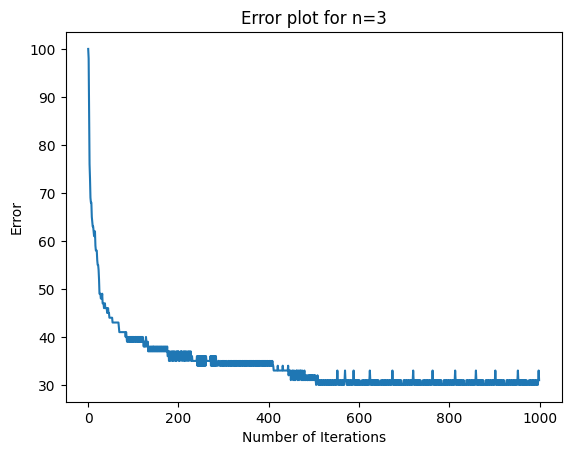

In [ ]:
plt.plot(errors2)
plt.xlabel("Number of Iterations")
plt.ylabel("Error")
plt.title("Error plot for n=3")